# _Restaurant Recommendation System_
## Prepare import

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
ratings_data = pd.read_csv('GoogleReview_data_cleaned.csv', low_memory = False)
print("Review data:", ratings_data.shape)
print("\nCheck NULL values in Reviews:\n-----------------------------")
print(ratings_data.isnull().sum())
print("-----------------------------")
ratings_data.head()

Review data: (222020, 5)

Check NULL values in Reviews:
-----------------------------
Author        0
Rating        0
Review        0
Restaurant    0
Location      0
dtype: int64
-----------------------------


,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


In [6]:
restaurants_review_data = ratings_data.copy()
restaurants_review_data.head()

,Author,Rating,Review,Restaurant,Location
0,Jia Pin Lee,4.0,Came here for the High Tea. Great service espe...,Cuisines Restaurant,Ipoh
1,Chui Yi Lum,2.0,"5 stars for the service, even though some of t...",Cuisines Restaurant,Ipoh
2,liezel wong,1.0,"Hi, thank you for your service. But! i feel so...",Cuisines Restaurant,Ipoh
3,Nazri Nor,1.0,I have the worse buffer dinner ever so far. Th...,Cuisines Restaurant,Ipoh
4,Fakru Imran's Channel,5.0,"That's are Known 5 Elmark "" 9H72 "" & KDK "" 3 K...",Cuisines Restaurant,Ipoh


## Load Data
### GoogleReview
#### View Sample, Check Null Data For Review

## Data Preprocessing

In [7]:
# Consider only those author who have rated more than 10 restaurants and those restaurant which are having at least 20 ratings
x = restaurants_review_data.groupby('Author').count()['Rating'] > 10
quality_author  = x[x].index

restaurants_review_data = restaurants_review_data[restaurants_review_data['Author'].isin(quality_author)]

y = restaurants_review_data.groupby('Restaurant')['Rating'].count() >= 20
famous_restaurants = y[y].index

restaurants_review_data = restaurants_review_data[restaurants_review_data['Restaurant'].isin(famous_restaurants)]

Reset index of the **restaurants_review_data**

In [8]:
restaurants_review_data = restaurants_review_data.reset_index()
# drop index column, axis = 0 indicates rows, 1 indicates columns
restaurants_review_data = restaurants_review_data.drop(['index'], axis=1)
restaurants_review_data.shape

(15593, 5)

Remove duplicates and get the **total number of restaurants = 420**

In [9]:
# Get the restaurants in this dataset without duplicates
restaurants_data = restaurants_review_data.drop_duplicates(subset=['Restaurant'])

# reset index of restaurants_data
restaurants_data = restaurants_data.reset_index() 
restaurants_data.shape

(420, 6)

## Data Visualization

### Number of Restaurants By City

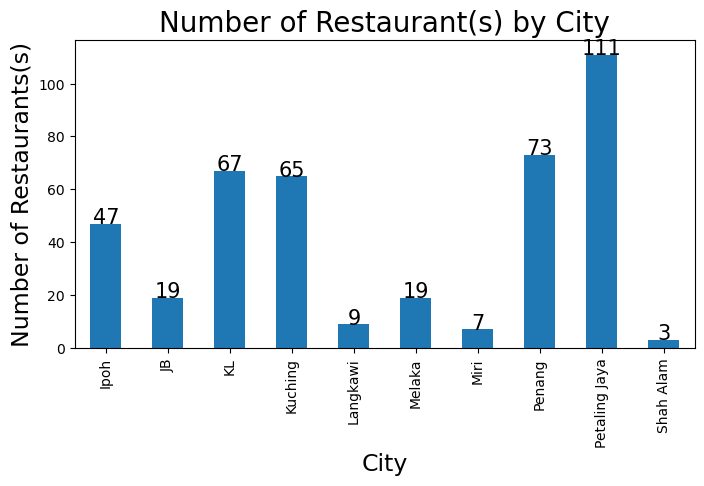

In [10]:
state_counts = restaurants_data.groupby('Location')['Restaurant'].count()
state_counts.plot(kind='bar', figsize = (8, 4))
plt.title('Number of Restaurant(s) by City', fontsize = 20)
plt.xlabel('City', fontsize = 17)
plt.ylabel('Number of Restaurants(s)', fontsize = 17)
for i in range(len(state_counts)):
    plt.text(x=i, y = state_counts.iloc[i], s = state_counts.iloc[i], ha = 'center', fontsize = 15)
plt.show()

# Content-Based Filtering Recommendation System

### Building Restaurant-Author Interactions Matrix


In [11]:
# use pivot_table because in our datasets, a restaurant have multiple ratings, so we cannot just calculate similarity scores based on the restaurants_review_data
pt = restaurants_review_data.pivot_table(index = 'Restaurant', columns = 'Author', values = 'Rating').fillna(0)
pt
# index = 'Restaurant' columns = 'Author' --> this is the average rating given to each restaurant by the authors
# index = 'Author' columns = 'Restaurant' --> this is the average rating given by the authors to each restaurant (the average rating of an author given to all restaurants)

Author,5525 Gunner,6od5p33d,A 10,A K,A L,A P,A Y,A.,A.L Lim,AL Lim,...,κεηηγsκ,さなえ,パイパイ,レミィRemmy,兴哥Heng Gor,几米林Jimmy,小虫WeiXiang,暝纥Enoch,洪佳武,纯粹享
Restaurant,,,,,,,,,,,,,,,,,,,,,
16th St. Cafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28 Food Centre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33 Blue Room,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
362 Heong Peah 362炭烧香饼,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7 Spice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
人間茶坊之老店 Life Cafe @ Padungan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
北栈食馆 Bei Zhan Restaurant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
富二代 Fu Er Dai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## a. Content Recommend Based On Cosine Similarity

Cosine similarity is used in content-based filtering because it measures the similarity between two restaurants based on their content features. In content-based filtering, restaurants are represented as a set of features, and similarity between restaurants is calculated based on the similarity between their features. The cosine similarity metric is used to compute the similarity between two restaurants based on the angle between their feature vectors.

In [12]:
def retrieveRestaurants(similarity_scores, isFilter):
    newData = restaurants_data.copy()
    newData['Score'] = np.nan
    
    for a, i in enumerate(similarity_scores):
        newData.loc[newData['Restaurant'] == pt.index[i[0]], 'Score'] = similarity_scores[a][1]
        
    newData = newData.sort_values('Score', ascending = False)
    
    if isFilter == False:
        return newData[:numberOfSuggestion]
    else:
        newData = newData[newData['Location'] == cityToFilter]
        for idx, row in newData.iterrows():
            if row['Score'] == 0.0:
                newData = newData.drop(idx)
        return newData

In [13]:
# Using cosine similarity metrics
similarity_scores_cs = cosine_similarity(pt)

def recommendByCos(restaurantName, isFilter):
    index = np.where(pt.index == restaurantName)[0][0]
    similar_restaurants = sorted(enumerate(similarity_scores_cs[index]),key= lambda x: x[1], reverse =True)[1:]

    return retrieveRestaurants(similar_restaurants, isFilter)

### a. User Interaction Sessions

Sample data:
- 富二代 Fu Er Dai
- 越南小廚 V NAM KITCHEN
- 食得福美食中心Cedar Point Food Centre
- 北栈食馆 Bei Zhan Restaurant

Prompt the user to enter the restaurant name and based on the restaurant name provided to recommend restaurants to the user

In [18]:
print("-----------------------------------------------------------------")
print("NOTE: Restaurant NAME must be in full form")
restaurant = input("Please provide a restaurant name: ")

numberOfSuggestion = None
cityOrNo = ''

print("\nNOTE: Enter 'y' for YES, others input will be considered NO")
prompt = input('Do you want the recommendations based on city? ')
if prompt == 'y': 
    print("\nHere're available CITY: ")
    print("-----------------------")
    print("Ipoh, KL, Petaling Jaya, Miri, Melaka")
    print("Kuching, Langkawi, Penang, Shah Alam, JB\n")
    cityToFilter = input('Enter a CITY from options above: ')
    cityOrNo = True
else: 
    print("\nNOTE: Please provide in NUMBER")
    print('Enter the number of recommendations you want: ')
    numberOfSuggestion = int(input())
    while numberOfSuggestion < 1:
        try:
            numberOfSuggestion = int(input())
        except ValueError:
            print('Please enter an integer!!')
            continue
        if numberOfSuggestion < 1:
            print("Please enter positive integer only!!")
    cityOrNo = False

-----------------------------------------------------------------
NOTE: Restaurant NAME must be in full form
Please provide a restaurant name: 人間茶坊之老店 Life Cafe @ Padungan

NOTE: Enter 'y' for YES, others input will be considered NO
Do you want the recommendations based on city? y

Here're available CITY: 
-----------------------
Ipoh, KL, Petaling Jaya, Miri, Melaka
Kuching, Langkawi, Penang, Shah Alam, JB

Enter a CITY from options above: KL


In [19]:
restaurants = recommendByCos(restaurant, cityOrNo)
num_rows, num_cols = restaurants.shape
print("Welcome Sir/Madam!\nThis session is about Content Recommendation By Cosine Similarity")
if num_rows == 0:
    print('❌ There is no recommendable restaurants from the city you provided')
else:
    print('Restaurant recommendation based on Your input: ' + restaurant)
    print('======================================================================================')
    selected_columns = restaurants.loc[:, ['Restaurant', 'Location', 'Score']]
    headers = ['Restaurant', 'Location', 'Score']
    print(tabulate(selected_columns, headers=headers, tablefmt='fancy_grid'))
    print('Number of restaurants recommended: ' + str(len(selected_columns)))

Welcome Sir/Madam!
This session is about Content Recommendation By Cosine Similarity
Restaurant recommendation based on Your input: 人間茶坊之老店 Life Cafe @ Padungan
╒═════╤═══════════════════════════════════════════════╤════════════╤═══════════╕
│     │ Restaurant                                    │ Location   │     Score │
╞═════╪═══════════════════════════════════════════════╪════════════╪═══════════╡
│ 285 │ Sri Nirwana Maju Restaurant - Bangsar         │ KL         │ 0.0581252 │
├─────┼───────────────────────────────────────────────┼────────────┼───────────┤
│ 252 │ Manja Old Malaya                              │ KL         │ 0.057242  │
├─────┼───────────────────────────────────────────────┼────────────┼───────────┤
│ 286 │ Michelangelo's Restaurant & Bar @ Pavilion KL │ KL         │ 0.0354031 │
├─────┼───────────────────────────────────────────────┼────────────┼───────────┤
│ 295 │ Marta's Kitchen @ Hartamas                    │ KL         │ 0.0350874 │
├─────┼──────────────────────

## b. Content Recommend Based On Linear Kernel

Linear kernel is a type of kernel function that is used in Support Vector Machines (SVM) for classification or regression tasks. In content-based filtering, the linear kernel is used to compute the similarity between two restaurants based on their feature vectors.

In [16]:
similarity_scores_lk = linear_kernel(pt)

def recommendByLin(restaurantName, isFilter):
    index = np.where(pt.index== restaurantName)[0][0]
    similar_restaurants = sorted(enumerate(similarity_scores_lk[index]), key = lambda x: x[1], reverse = True)[1:]
    
    return retrieveRestaurants(similar_restaurants, isFilter)

### b. User Interaction Sessions 

Sample data:
- 富二代 Fu Er Dai
- 越南小廚 V NAM KITCHEN
- 食得福美食中心Cedar Point Food Centre
- 北栈食馆 Bei Zhan Restaurant

In [20]:
restaurants = recommendByLin(restaurant, cityOrNo)
num_rows, num_cols = restaurants.shape
print("Welcome Sir/Madam!\nThis session is about Content Recommendation By Linear Kernel")
if num_rows == 0:
    print('❌ There is no recommendable restaurants from the city you provided')
else:
    selected_columns = restaurants.loc[:, ['Restaurant', 'Location', 'Score']]
    headers = ['Restaurant', 'Location', 'Score']
    print(tabulate(selected_columns, headers=headers, tablefmt='fancy_grid', floatfmt = '.1f'))
    print('Number of restaurants recommended: ' + str(len(selected_columns)))    

Welcome Sir/Madam!
This session is about Content Recommendation By Linear Kernel
╒═════╤═══════════════════════════════════════════════╤════════════╤═════════╕
│     │ Restaurant                                    │ Location   │   Score │
╞═════╪═══════════════════════════════════════════════╪════════════╪═════════╡
│ 285 │ Sri Nirwana Maju Restaurant - Bangsar         │ KL         │    36.0 │
├─────┼───────────────────────────────────────────────┼────────────┼─────────┤
│ 295 │ Marta's Kitchen @ Hartamas                    │ KL         │    25.0 │
├─────┼───────────────────────────────────────────────┼────────────┼─────────┤
│ 252 │ Manja Old Malaya                              │ KL         │    25.0 │
├─────┼───────────────────────────────────────────────┼────────────┼─────────┤
│ 245 │ Khan’s Indian Cuisine                         │ KL         │    20.0 │
├─────┼───────────────────────────────────────────────┼────────────┼─────────┤
│ 286 │ Michelangelo's Restaurant & Bar @ Pavilion